In [1]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
z1 = pd.Series([2,4,6,np.nan,8,10])
z1

0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64

In [3]:
# by default (without specifying them explicitly), the index label is just an int
z1[5]

10.0

In [4]:
# create a couple more Series
z2, z3 = pd.Series(np.random.randn(8)), pd.Series(np.random.randn(8))

In [5]:
# combine multiple Series into a DataFrame with column labels
data_1 = pd.DataFrame({'X': z1, 'Y': z2, 'Z': z3})

data_1

,X,Y,Z
0,2.0,-1.185882,-0.900413
1,4.0,0.336437,-0.385194
2,6.0,-0.322205,1.129235
3,NaN,-0.284417,-2.464121
4,8.0,-1.565248,-0.434579
5,10.0,2.013053,0.224243
6,NaN,0.305677,0.727708
7,NaN,-0.502175,-0.885922


In [7]:
# when Series are different lengths, DataFrame fills in gaps with NaN
z4 = pd.Series(np.random.randn(10))  # whoaaaaaa this Series has extra entries!

data_1 = pd.DataFrame({'X': z1, 'Y': z2, 'Z': z3, 'Q': z4})

data_1

,Q,X,Y,Z
0,-0.511037,2.0,-1.185882,-0.900413
1,0.242702,4.0,0.336437,-0.385194
2,1.442629,6.0,-0.322205,1.129235
3,0.548581,NaN,-0.284417,-2.464121
4,1.267230,8.0,-1.565248,-0.434579
5,-0.585332,10.0,2.013053,0.224243
6,0.507876,NaN,0.305677,0.727708
7,1.098299,NaN,-0.502175,-0.885922
8,-1.268731,NaN,NaN,NaN
9,0.303174,NaN,NaN,NaN


In [8]:
# create a DataFrame from numpy array
data_2 = pd.DataFrame(np.random.randn(6,4))

data_2            

,0,1,2,3
0,2.209825,0.431326,0.025883,-0.766199
1,-0.456810,0.095466,1.854455,1.599547
2,1.026037,0.973719,-1.522114,0.661737
3,1.831123,0.789847,-0.600691,0.994681
4,1.368195,-1.107294,0.341154,-0.687818
5,-0.518897,1.506402,0.536186,1.969060


In [11]:
# recall current dataframe 
data_2.head(3)

,0,1,2,3
0,2.209825,0.431326,0.025883,-0.766199
1,-0.456810,0.095466,1.854455,1.599547
2,1.026037,0.973719,-1.522114,0.661737


In [29]:
cols = ['w', 'x', 'y', 'z']

# assign columns attribute (names) 
data_2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2012-10-18 15:15:47', freq='W', periods=6)
data_2.index = dates

data_2

,w,x,y,z
2012-10-21 15:15:47,2.209825,0.431326,0.025883,-0.766199
2012-10-28 15:15:47,-0.456810,0.095466,1.854455,1.599547
2012-11-04 15:15:47,1.026037,0.973719,-1.522114,0.661737
2012-11-11 15:15:47,1.831123,0.789847,-0.600691,0.994681
2012-11-18 15:15:47,1.368195,-1.107294,0.341154,-0.687818
2012-11-25 15:15:47,-0.518897,1.506402,0.536186,1.969060


In [30]:
print 'what is a date_range object?\n\n', dates

what is a date_range object?

DatetimeIndex(['2012-10-21 15:15:47', '2012-10-28 15:15:47',
               '2012-11-04 15:15:47', '2012-11-11 15:15:47',
               '2012-11-18 15:15:47', '2012-11-25 15:15:47'],
              dtype='datetime64[ns]', freq='W-SUN')


In [34]:
data_2.loc['2012-10-21 15:15:47','y']

0.025883307888474334

In [37]:
data_2.loc['2012-10-21 15:15:47']

w    2.209825
x    0.431326
y    0.025883
z   -0.766199
Name: 2012-10-21 15:15:47, dtype: float64

In [38]:
data_1 = pd.DataFrame(np.random.randn(5,5), index=list('qwert'),columns=list('asdfe'))

data_1

,a,s,d,f,e
q,0.318560,0.705038,1.173174,0.989572,-0.049835
w,-0.037680,1.246265,-0.395300,0.743357,-0.968436
e,0.935845,-1.234180,-0.826226,-0.754131,-1.216890
r,0.108705,-1.995318,0.753204,-1.480841,0.489441
t,-0.526665,0.301347,1.061463,-0.421928,1.108151


In [40]:
data_1.loc[['e','r'],'s':'f']

,s,d,f
e,-1.234180,-0.826226,-0.754131
r,-1.995318,0.753204,-1.480841


In [41]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')


In [43]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, 
data_1 = pd.read_csv('Data/twitter_sample.csv', sep='|', names=colnames)

data_1.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [44]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print data_1.columns
print data_1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns


Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')
Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOf

In [46]:
data_1.tail(8)


,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
87,"tag:search.twitter.com,2005:351835321056509952",2013-07-01T22:50:51.000Z,And I'm the one that always gets hit on. OKAAAAY.,None,None,None,['en'],en,en,"[34.09956425, -117.40411515]",Point,"['[-117.436711, 34.023746]', '[-117.436711, 34...",Polygon,"Rialto, CA",US,-28800,Arizona-Cali,None,None,None,None,None,None,None,None,Cilli♡,Cilli_021112,382278854,30,557,440,1,18434,Tweet,None,None,None
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [48]:

data_1[data_1.twitter_lang == 'en'].head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [66]:
data_2 = data_1[["actor:listedCount","actor:followersCount", "actor:friendsCount", "actor:statusesCount"]]

data_2.head()

,actor:listedCount,actor:followersCount,actor:friendsCount,actor:statusesCount
0,0,178,129,2028
1,0,144,215,4071
2,0,37,54,3505
3,1,438,174,17636
4,0,12,6,145


In [67]:
data_2.dtypes  

actor:listedCount       int64
actor:followersCount    int64
actor:friendsCount      int64
actor:statusesCount     int64
dtype: object

In [51]:
data_2.dtypes 

body                    object
actor:displayName       object
actor:followersCount     int64
actor:statusesCount      int64
dtype: object

In [59]:
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [69]:
data_2['actor:followersCount'] = data_2['actor:followersCount'].map(floatify)

data_2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


actor:listedCount         int64
actor:followersCount    float64
actor:friendsCount        int64
actor:statusesCount       int64
dtype: object

In [107]:
data_2 = data_2.astype(float)

data_2.dtypes

actor:listedCount        float64
actor:followersCount     float64
actor:friendsCount       float64
actor:statusesCount      float64
fol/fr                   float64
folcount/friendscount    float64
dtype: object

In [108]:
data_2['folcount/friendscount'] = data_2['actor:followersCount'] / data_2['actor:friendsCount']

data_2.head()

,actor:listedCount,actor:followersCount,actor:friendsCount,actor:statusesCount,fol/fr,folcount/friendscount
0,0.0,178.0,129.0,2028.0,1.379845,1.379845
1,0.0,144.0,215.0,4071.0,0.669767,0.669767
2,0.0,37.0,54.0,3505.0,0.685185,0.685185
3,1.0,438.0,174.0,17636.0,2.517241,2.517241
4,0.0,12.0,6.0,145.0,2.000000,2.000000


In [115]:
data_1.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [126]:
population_df = data_1[data_1["actor:followersCount"] > 75]

In [128]:
language_group = population_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')

language_group.head(2)  




,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
1,es,32,144,215,4071
3,es,50,438,174,17636
5,tr,41,226,346,7759
6,pt,42,247,64,2438
8,en,38,380,860,3116
9,en,41,160,135,4170
16,und,53,1179,628,20141
18,he,37,151,284,641
20,it,46,1999,293,60236


In [130]:
language_group_mean = language_group.aggregate(np.mean)  

language_group_mean.head()

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1747.285714,568.857143,15933.085714
es,1273.733333,421.066667,8404.666667
fr,96.333333,86.000000,4309.666667
he,151.000000,284.000000,641.000000


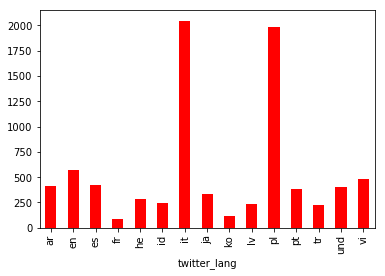

In [131]:
language_group_mean['actor:friendsCount'].plot(kind='bar', color='r')

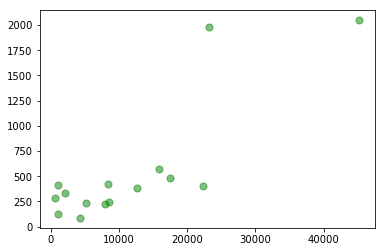

In [132]:
plt.scatter(x=language_group_mean['actor:statusesCount'],\
            y=language_group_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='g',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020e00e3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f020d9ae050>]], dtype=object)

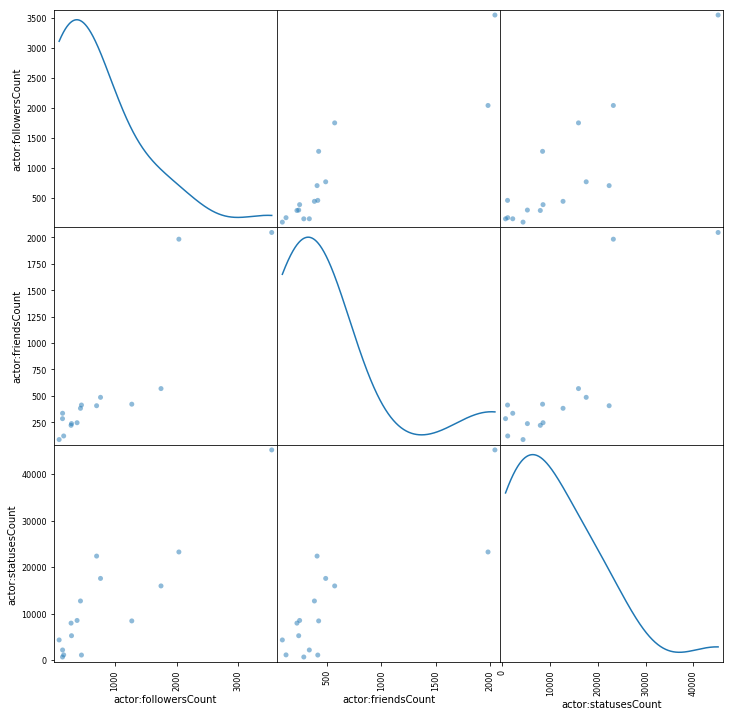

In [135]:
from pandas.plotting import scatter_matrix

scatter_matrix(language_group_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

In [142]:
data_f = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/3/2001', periods=1000), columns=list('QWER'))
data_f = data_f.cumsum()
data_f.head()

,Q,W,E,R
2001-01-03,-1.729558,-0.320363,-1.357675,0.070317
2001-01-04,-1.770542,-0.457977,-0.300751,0.783515
2001-01-05,-2.723964,1.190763,-1.278313,-0.203462
2001-01-06,-2.919090,1.342349,-1.607232,-0.231046
2001-01-07,-3.289513,0.212780,-1.534876,-0.289523


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020d5d9d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f020d44a550>]], dtype=object)

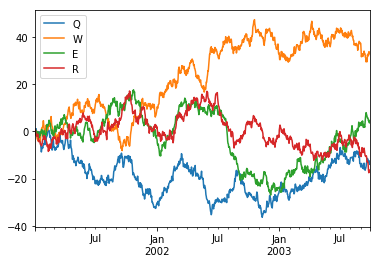

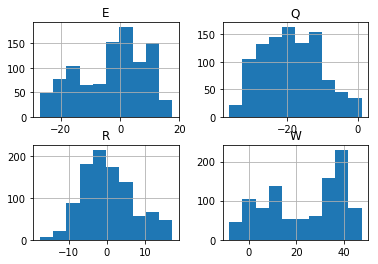

In [139]:
data_f.plot()
data_f.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020d13e890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f020cfb64d0>]], dtype=object)

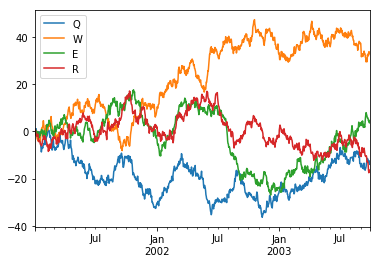

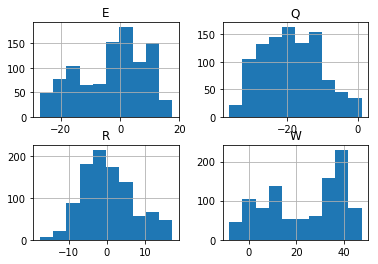

In [140]:
import prettyplotlib

data_f.plot()
data_f.hist()

In [143]:
%matplotlib inline

In [144]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [145]:
import seaborn as sns
sns.set(color_codes=True)

In [146]:
np.random.seed(sum(map(ord, "distributions")))

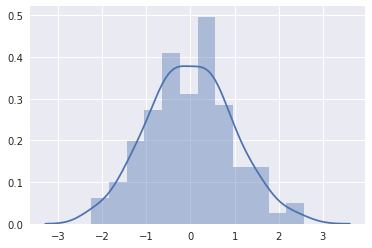

In [149]:
z = np.random.normal(size=200)
sns.distplot(z);

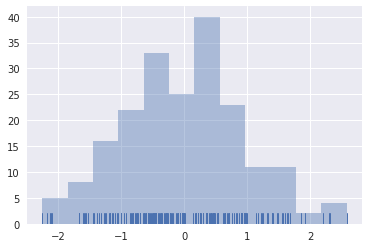

In [150]:
sns.distplot(z, kde=False, rug=True);

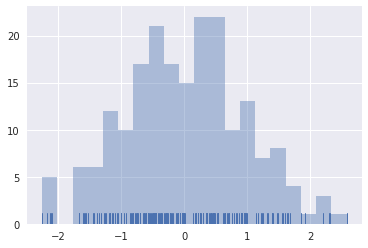

In [151]:
sns.distplot(z, bins=20, kde=False, rug=True);

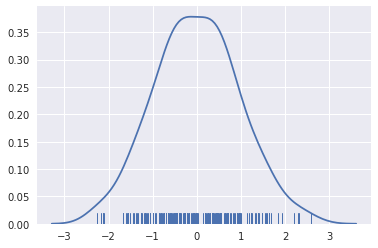

In [152]:
sns.distplot(z, hist=False, rug=True);

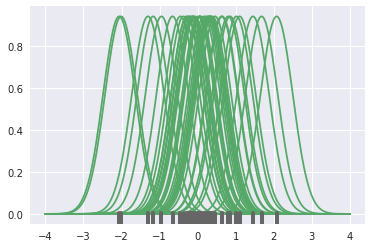

In [155]:
z = np.random.normal(0, 1, size=40)
bandwidth = 1.06 * z.std() * z.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for z_i in z:

    kernel = stats.norm(z_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="g")

sns.rugplot(z, color=".4", linewidth=4);

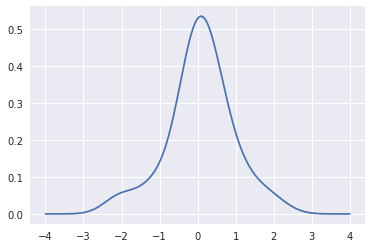

In [157]:
densCT = np.sum(kernels, axis=0)
densCT /= integrate.trapz(densCT, support)
plt.plot(support, densCT);

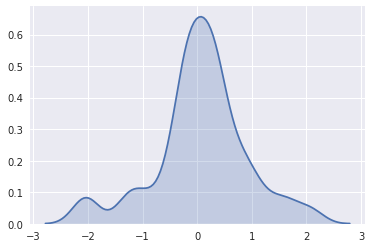

In [158]:
sns.kdeplot(z, shade=True);

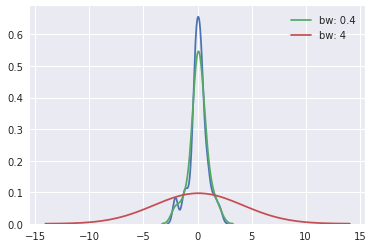

In [159]:
sns.kdeplot(z)
sns.kdeplot(z, bw=.4, label="bw: 0.4")
sns.kdeplot(z, bw=4, label="bw: 4")
plt.legend();

In [171]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
data_1 = pd.DataFrame(data, columns=["x", "y"])

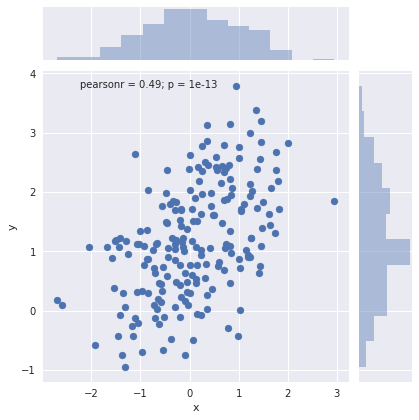

In [172]:
sns.jointplot(x="x", y="y", data=data_1);

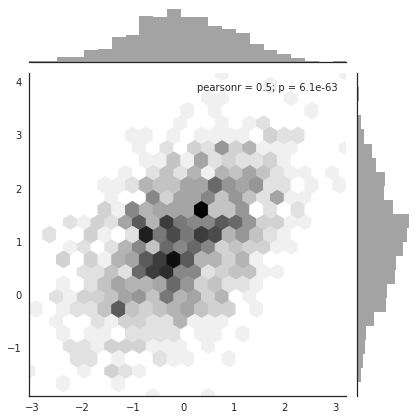

In [180]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

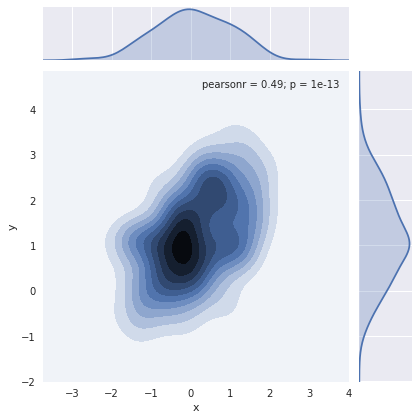

In [181]:
sns.jointplot(x="x", y="y", data=data_1, kind="kde");

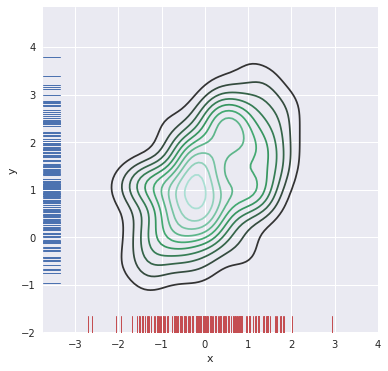

In [192]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data_1.x, data_1.y, ax=ax)
sns.rugplot(data_1.x, color="r", ax=ax)
sns.rugplot(data_1.y, vertical=True, ax=ax);

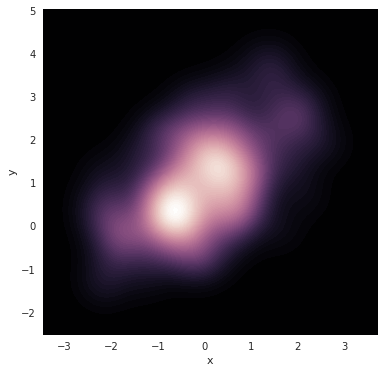

In [196]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=90, shade=True);

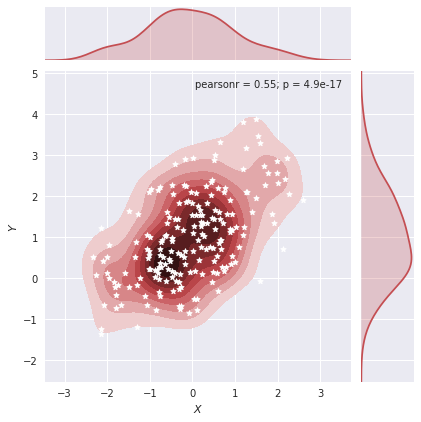

In [199]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

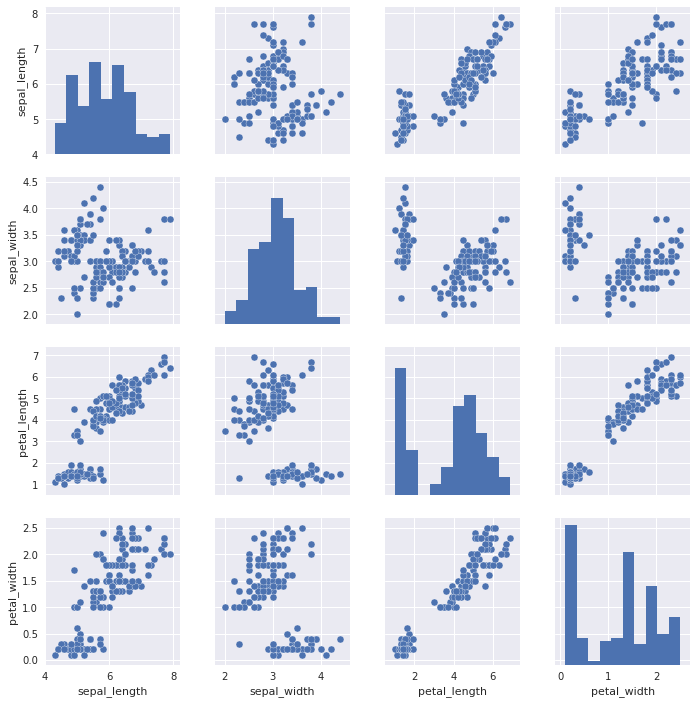

In [200]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

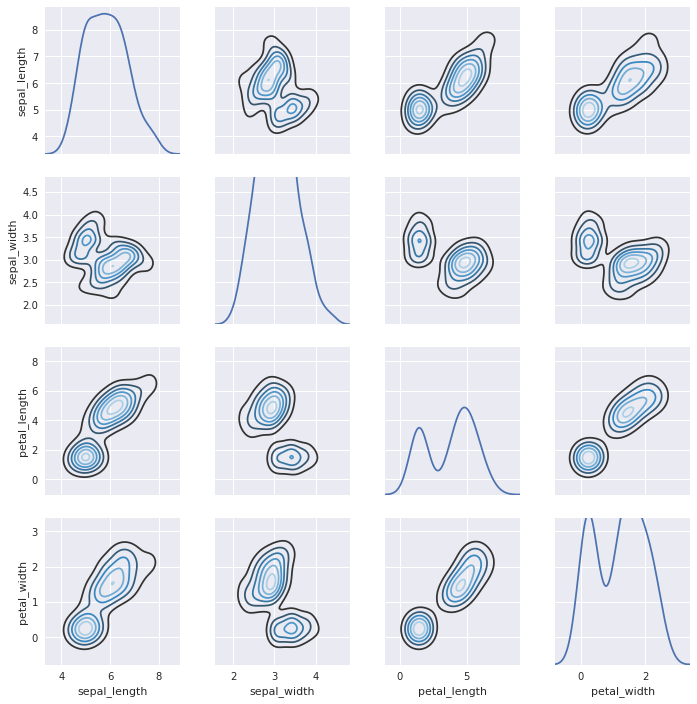

In [204]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [205]:
%matplotlib inline

In [206]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [207]:
import seaborn as sns
sns.set(color_codes=True)

In [208]:
np.random.seed(sum(map(ord, "regression")))

In [209]:
tips = sns.load_dataset("tips")

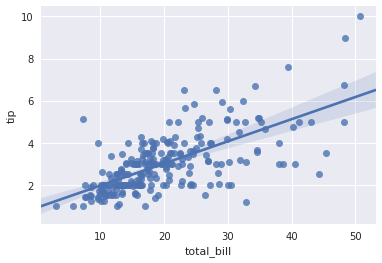

In [210]:
sns.regplot(x="total_bill", y="tip", data=tips);

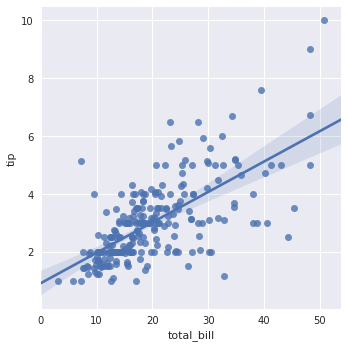

In [211]:
sns.lmplot(x="total_bill", y="tip", data=tips);

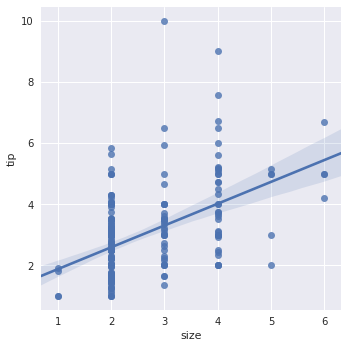

In [212]:
sns.lmplot(x="size", y="tip", data=tips);

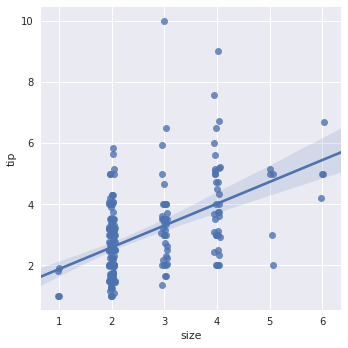

In [214]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.06);

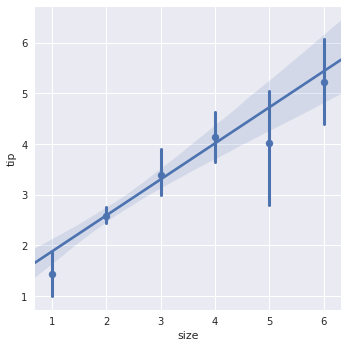

In [215]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [216]:
anscombe = sns.load_dataset("anscombe")

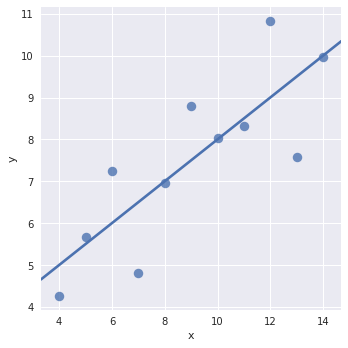

In [218]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 90});

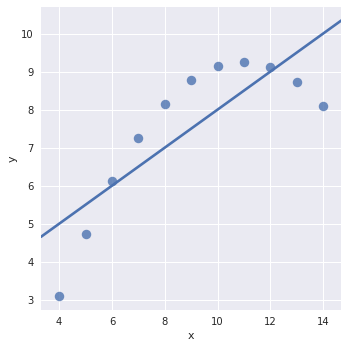

In [219]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 90});

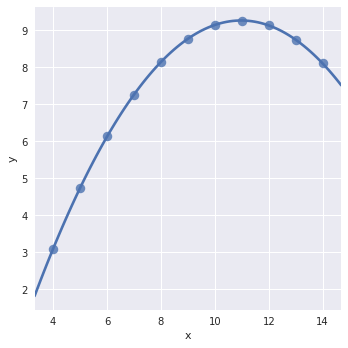

In [220]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 90});

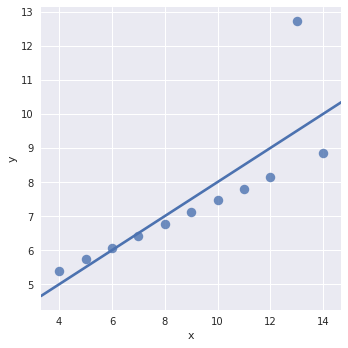

In [222]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 90});

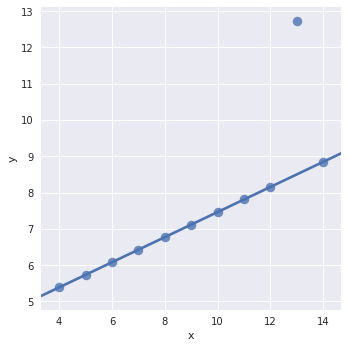

In [223]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 90});

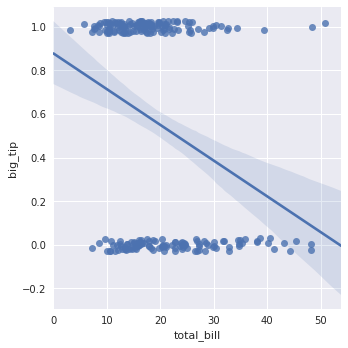

In [224]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

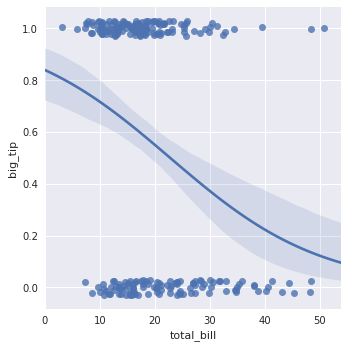

In [226]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

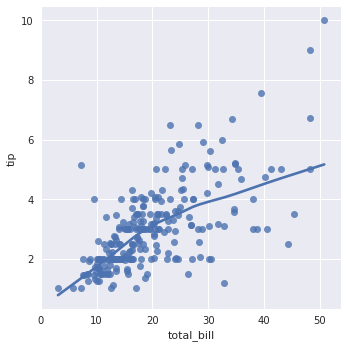

In [227]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

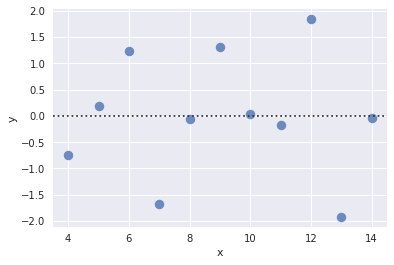

In [228]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 90});

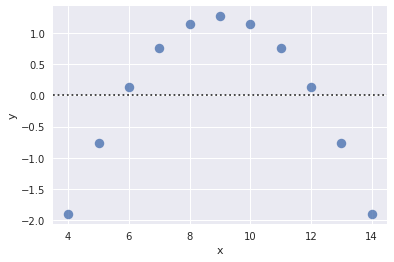

In [229]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 90});

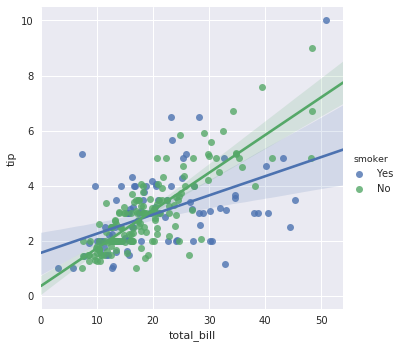

In [230]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

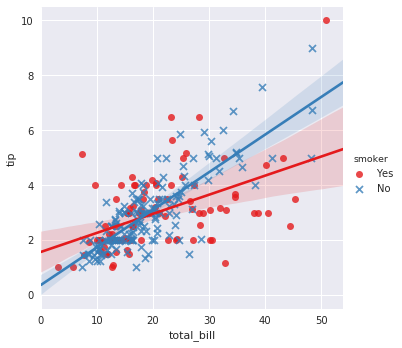

In [231]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

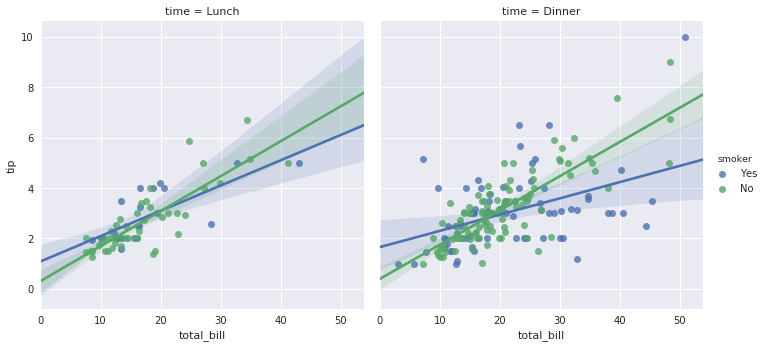

In [232]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

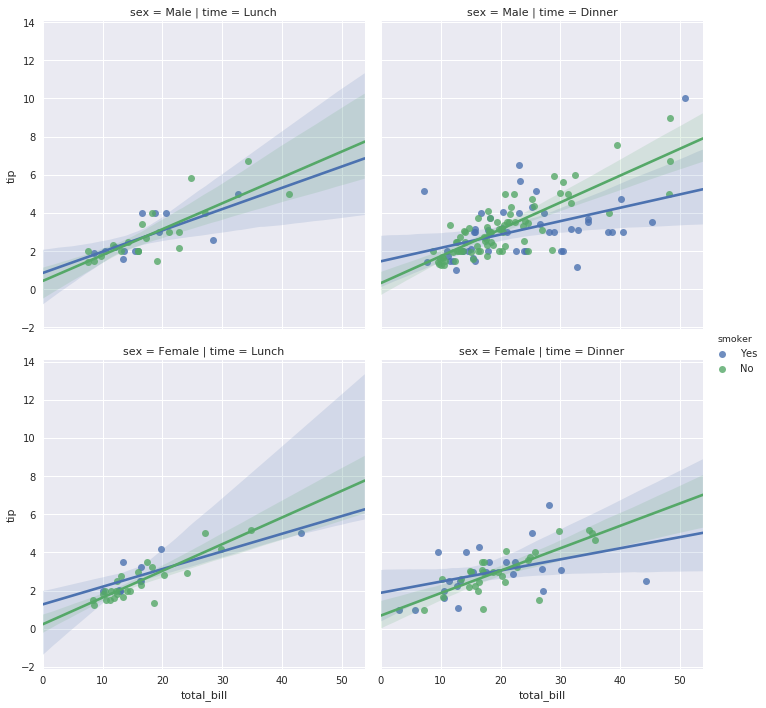

In [233]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

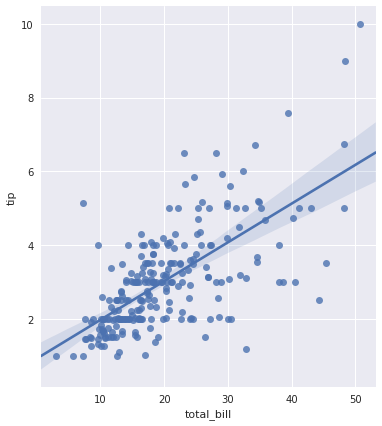

In [234]:
f, ax = plt.subplots(figsize=(6, 7))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

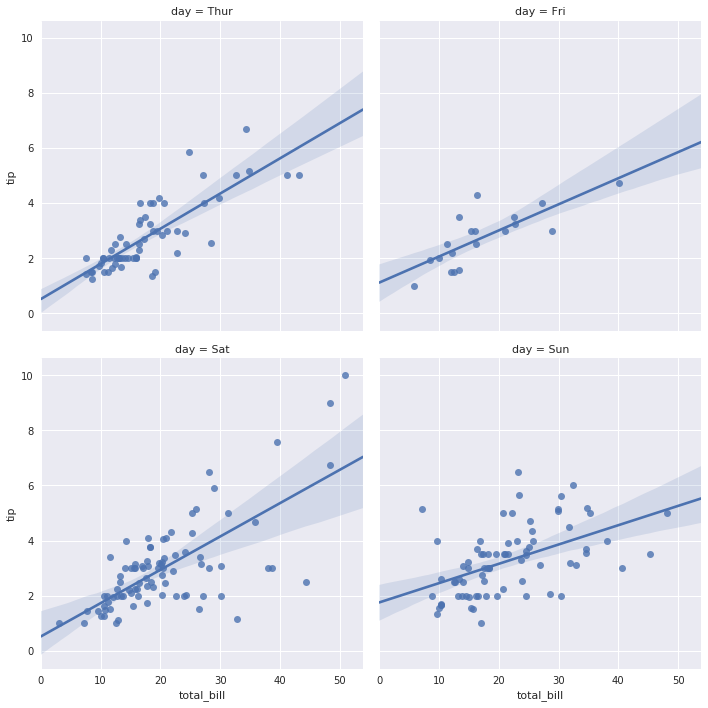

In [235]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=5);

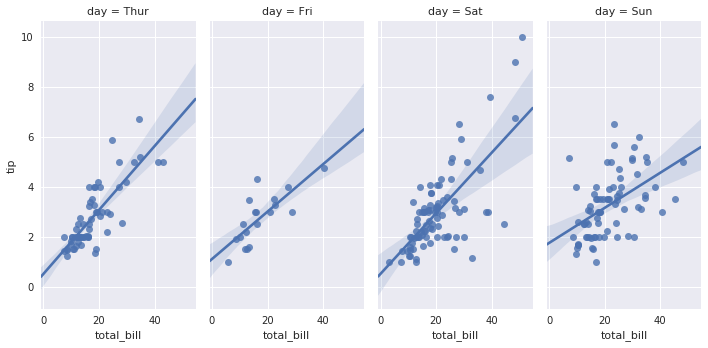

In [236]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

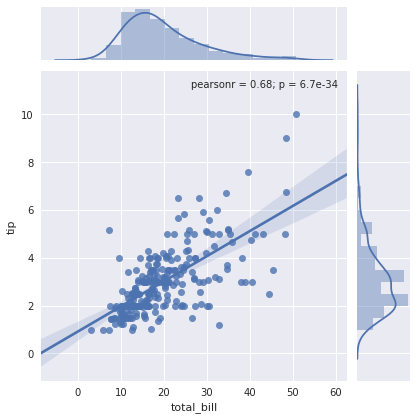

In [237]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

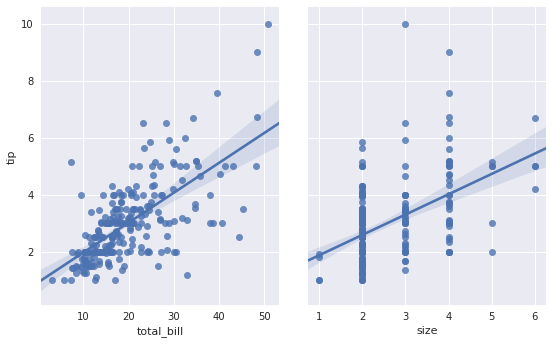

In [238]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

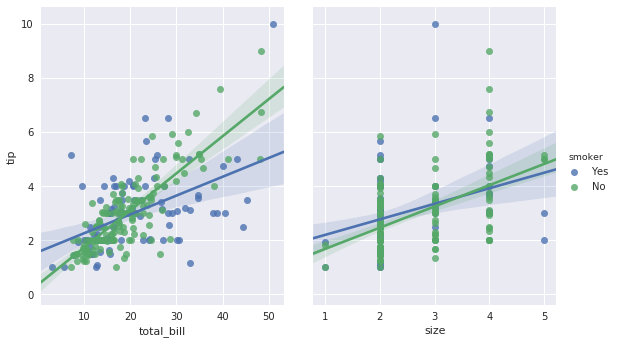

In [239]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

In [240]:
%matplotlib inline

In [241]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [242]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [243]:
np.random.seed(sum(map(ord, "categorical")))

In [244]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

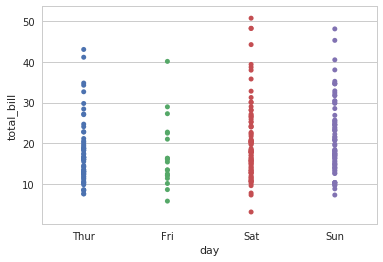

In [245]:
sns.stripplot(x="day", y="total_bill", data=tips);

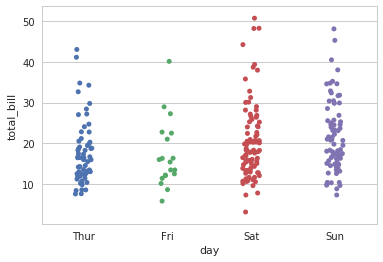

In [246]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

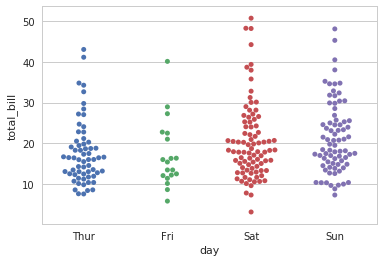

In [247]:
sns.swarmplot(x="day", y="total_bill", data=tips);

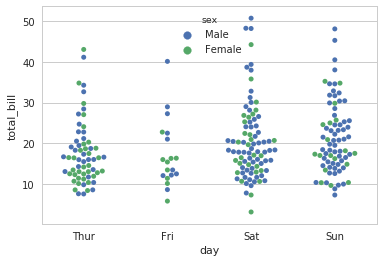

In [248]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

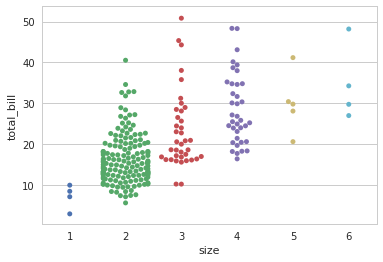

In [249]:
sns.swarmplot(x="size", y="total_bill", data=tips);

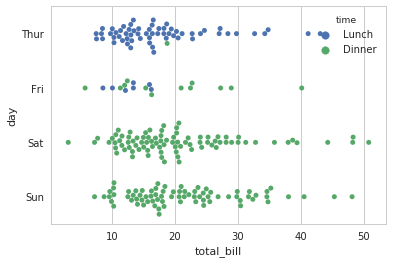

In [250]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

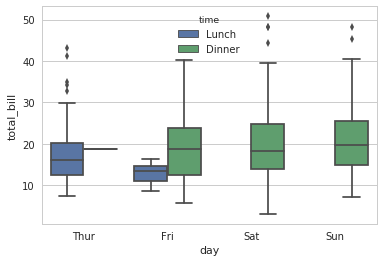

In [251]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

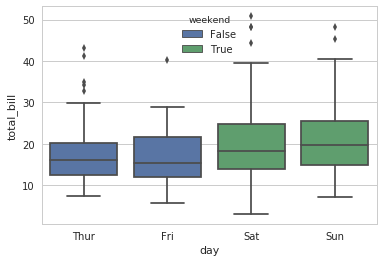

In [252]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

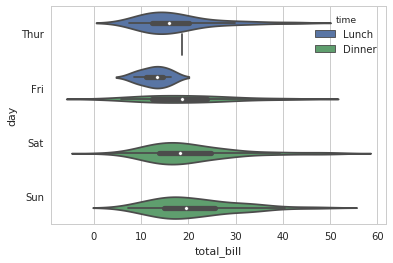

In [253]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

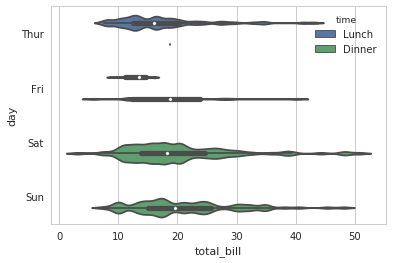

In [254]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

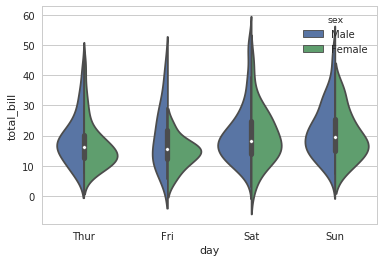

In [255]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

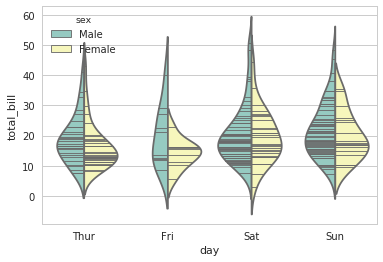

In [256]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

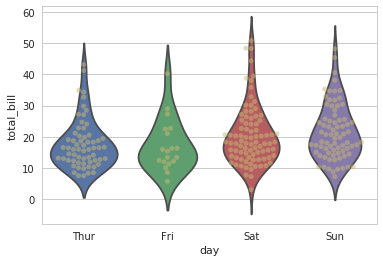

In [259]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="y", alpha=.5);

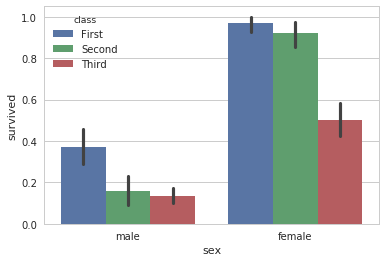

In [260]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

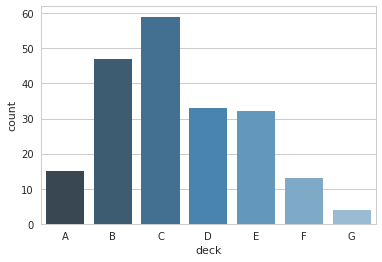

In [265]:
sns.countplot(x="deck", data=titanic, palette="Blues_d");

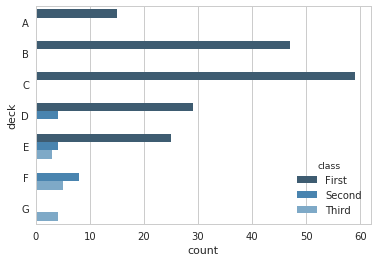

In [266]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Blues_d");

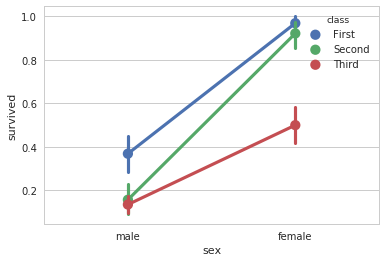

In [267]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

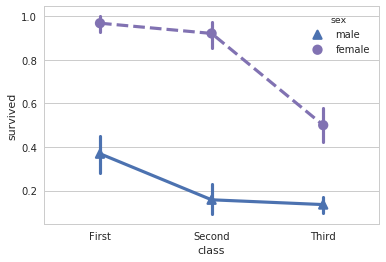

In [270]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "b", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

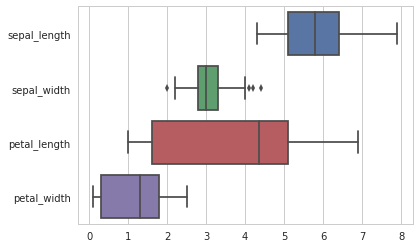

In [271]:
sns.boxplot(data=iris, orient="h");

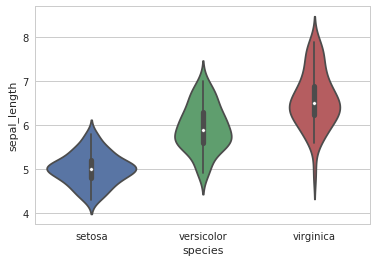

In [272]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

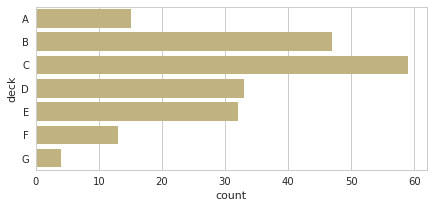

In [274]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="y");

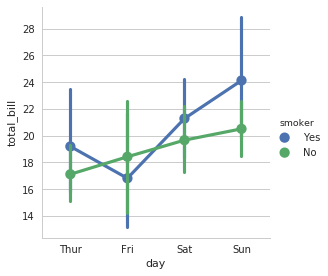

In [275]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

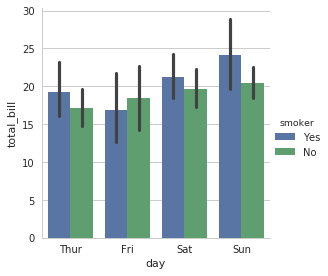

In [276]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

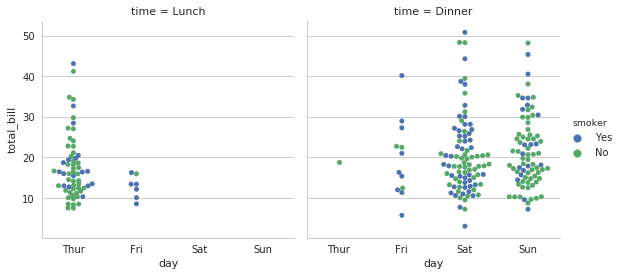

In [277]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

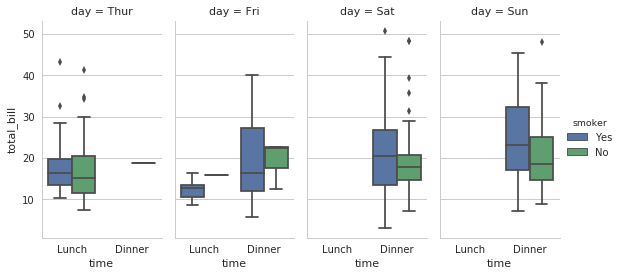

In [278]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

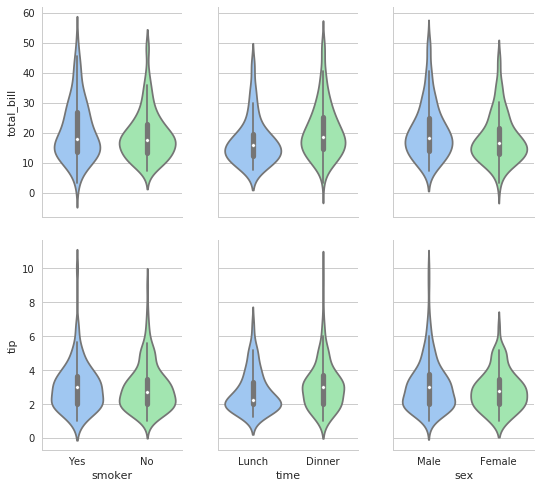

In [279]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");